In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

coste_paciente, per revista.xlsx datos_analisis2 - english.xlsx

In [2]:
path = "../dataset/"
cost_path = path + "coste_paciente, per revista.xlsx" 
analysis_path = path + "datos_analisis2 - english.xlsx" 

In [3]:
cost_df = pd.read_excel(cost_path)
cost_df.head()

,ID CODE,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type
0,10001,29.250,73.8,8.576,0.0,111.626,Hydrocolloid
1,30001,38.775,73.8,9.664,0.0,122.239,Hydrocolloid
2,30003,15.000,69.7,3.535,0.0,88.235,Hydrocolloid
3,30005,46.250,NaN,8.140,0.0,54.390,Hydrocolloid
4,30006,18.750,57.4,1.682,0.0,77.832,Hydrocolloid


In [4]:
cost_df.isnull().sum()

ID CODE             0
Nurse costs         0
Dressing costs     12
Material costs      0
Secondary costs     0
Total costs         0
Dressing type       0
dtype: int64

In [5]:
cost_df['Dressing costs'].describe()

count    157.000000
mean      59.128854
std       32.224129
min        4.100000
25%       45.100000
50%       59.520000
75%       71.910000
max      191.080000
Name: Dressing costs, dtype: float64

In [6]:
cost_df['Dressing costs'].fillna(cost_df['Dressing costs'].mean(), inplace=True)

In [7]:
cost_df['updated total cost'] = cost_df['Nurse costs'] + cost_df['Dressing costs'] + cost_df['Material costs'] + cost_df['Secondary costs']

In [8]:
cost_df.tail(10)

,ID CODE,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type,updated total cost
159,480007,23.750000,74.400000,14.40600,0.000,112.556000,Hydrocellular,112.556000
160,480008,22.250000,66.960000,10.46272,0.035,99.707720,Hydrocellular,99.707720
161,480011,24.266667,66.960000,7.88400,0.000,99.110667,Hydrocellular,99.110667
162,480012,18.750000,67.680000,4.63000,0.000,91.060000,Hydrocellular,91.060000
163,480014,31.250000,80.370000,9.81600,0.035,121.471000,Hydrocellular,121.471000
164,480016,12.500000,71.910000,6.75600,0.000,91.166000,Hydrocellular,91.166000
165,480018,27.500000,59.128854,8.99272,0.210,36.702720,Hydrocellular,95.831574
166,500001,7.500000,59.128854,1.90800,0.000,9.408000,Hydrocellular,68.536854
167,500002,17.500000,59.128854,4.44400,33.040,54.984000,Hydrocellular,114.112854
168,570002,8.000000,63.240000,3.43400,0.000,74.674000,Hydrocellular,74.674000


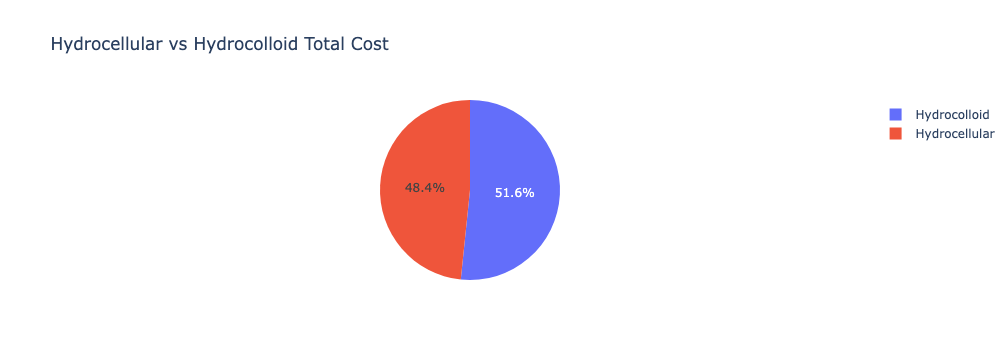

In [9]:
 px.pie(cost_df, values='updated total cost', names='Dressing type', title="Hydrocellular vs Hydrocolloid Total Cost")

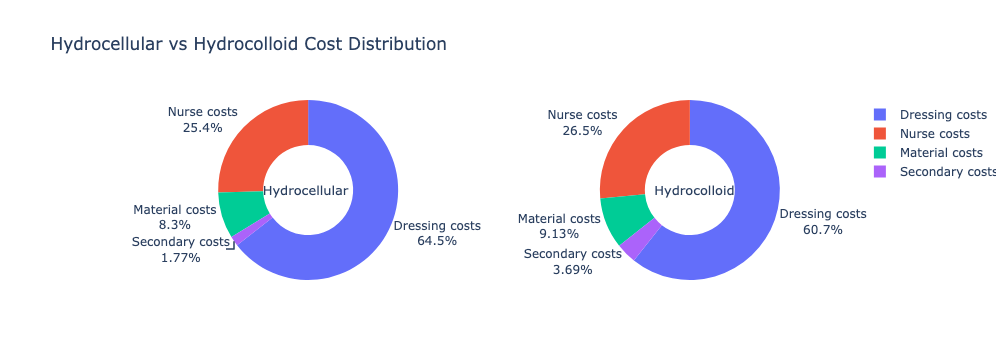

In [10]:

labels=['Nurse costs','Dressing costs', 'Material costs', 'Secondary costs']                                                          

nc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Nurse costs'].sum() 
dc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Dressing costs'].sum() 
mc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Material costs'].sum()
sc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Secondary costs'].sum()

nc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Nurse costs'].sum() 
dc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Dressing costs'].sum() 
mc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Material costs'].sum() 
sc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Secondary costs'].sum() 


values_ar = [nc_ar, dc_ar, mc_ar, sc_ar]
values_id = [nc_id, dc_id, mc_id, sc_id]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values_ar, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocellular"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=values_id, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocolloid"), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent+name")


fig.update_layout(title_text="Hydrocellular vs Hydrocolloid Cost Distribution", annotations=[dict(text='Hydrocellular', x=0.16, y=0.5, font_size=13, showarrow=False),
                 dict(text='Hydrocolloid', x=0.84, y=0.5, font_size=13, showarrow=False)])


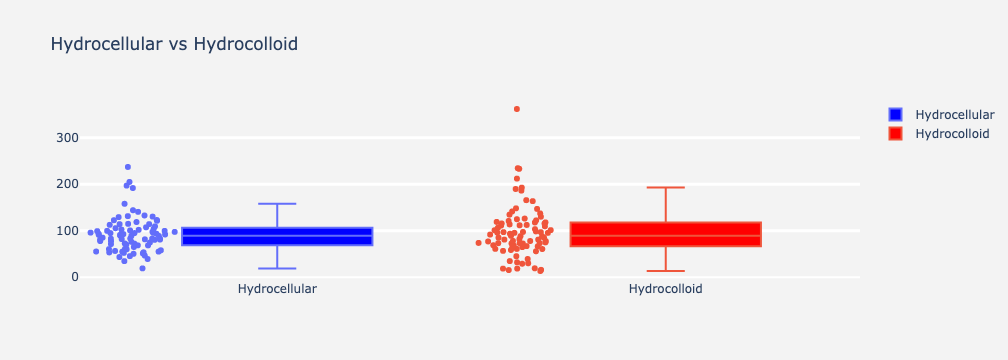

In [11]:

fig = go.Figure()
fig.add_trace(go.Box(y= cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['updated total cost'] 
, boxpoints='all', name='Hydrocellular',fillcolor='blue', jitter=0.5, whiskerwidth=0.2))

fig.add_trace(go.Box(y= cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['updated total cost'], boxpoints='all', name='Hydrocolloid',
                    fillcolor='red', jitter=0.5, whiskerwidth=0.2))
fig.update_layout(title='Hydrocellular vs Hydrocolloid', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                 gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')

In [12]:
analysis_df = pd.read_excel(analysis_path)
analysis_df.head()

,ID code,Sex,Age,Baseline visit,num. visit,Dressing type,Ulcer_stage,"Cured: 1, no cured: 2",infected,Postural changes,red_friccion,Avoided_infecion,Braden Scale,Push Scale,porc_postural changes,porc_friccion,porc_infec,Loss to follow up,Location
0,270009,Female,86,2015-09-11,2.0,Hydrocellular,1,2,2,0,0,0,Riesgo moderado,15,NaN,NaN,NaN,2,Trochanter
1,470003,Female,92,2014-09-19,2.0,Hydrocellular,2,2,2,0,0,0,Riesgo moderado,4,NaN,NaN,NaN,1,Trochanter
2,30006,Female,88,2014-06-03,2.0,Hydrocolloid,2,2,1,0,0,0,Riesgo moderado,6,NaN,NaN,NaN,2,Trochanter
3,100005,Female,91,2014-03-11,3.0,Hydrocolloid,1,2,2,1,1,1,Riesgo moderado,12,1.0,1.0,1.0,2,Trochanter
4,100011,Female,86,2015-09-28,4.0,Hydrocolloid,1,2,2,2,2,0,Sin riesgo,6,1.0,1.0,0.0,2,Trochanter


In [13]:
analysis_df.isnull().sum()

ID code                   0
Sex                       0
Age                       0
Baseline visit            0
num. visit                1
Dressing type             0
Ulcer_stage               0
Cured: 1, no cured: 2     0
infected                  0
Postural changes          0
red_friccion              0
Avoided_infecion          0
Braden Scale              0
Push Scale                0
porc_postural changes    44
porc_friccion            44
porc_infec               44
Loss to follow up         0
Location                  0
dtype: int64

In [14]:
analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocellular') & (analysis_df['Cured: 1, no cured: 2'] == 1)]['Cured: 1, no cured: 2'].count()

3

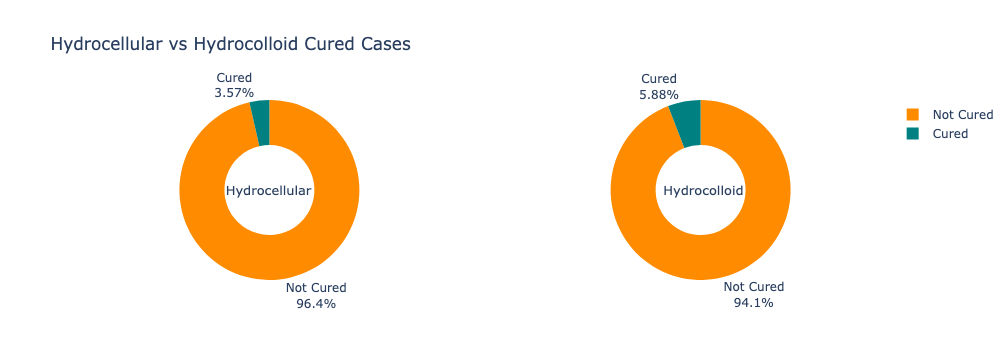

In [15]:

labels=['Cured','Not Cured']                                                          

c_ar = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocellular') & (analysis_df['Cured: 1, no cured: 2'] == 1)]['Cured: 1, no cured: 2'].count() 
n_ar = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocellular') & (analysis_df['Cured: 1, no cured: 2'] == 2)]['Cured: 1, no cured: 2'].count()


c_id  = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocolloid') & (analysis_df['Cured: 1, no cured: 2'] == 1)]['Cured: 1, no cured: 2'].count() 
n_id  = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocolloid') & (analysis_df['Cured: 1, no cured: 2'] == 2)]['Cured: 1, no cured: 2'].count()



values_ar = [c_ar, n_ar]
values_id = [c_id, n_id]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values_ar, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocellular"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=values_id, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocolloid"), 1, 2)

colors = ['teal', 'darkorange']


fig.update_traces(hole=.5, marker=dict(colors=colors))



fig.update_layout(title_text='Hydrocellular vs Hydrocolloid Cured Cases', 
                  annotations=[
                      dict(text='Hydrocellular', x=0.17, y=0.5, font_size=13, showarrow=False),
                      dict(text='Hydrocolloid', x=0.83, y=0.5, font_size=13, showarrow=False)])

In [16]:
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]

,ID code,Sex,Age,Baseline visit,num. visit,Dressing type,Ulcer_stage,"Cured: 1, no cured: 2",infected,Postural changes,red_friccion,Avoided_infecion,Braden Scale,Push Scale,porc_postural changes,porc_friccion,porc_infec,Loss to follow up,Location
14,460005,Male,59,2014-10-14,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,4,1.0,1.000000,1.000000,2,Trochanter
25,50016,Female,99,2015-08-12,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo bajo,4,1.0,1.000000,1.000000,2,Heel
62,140002,Female,91,2014-09-15,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,5,1.0,1.000000,1.000000,2,Sacrum
63,160002,Female,86,2014-04-08,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,12,1.0,1.000000,1.000000,2,Sacrum
66,250004,Female,80,2014-11-03,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,12,1.0,1.000000,1.000000,2,Sacrum
115,120003,Male,82,2014-07-02,8.0,Hydrocellular,2,1,2,6,6,6,Riesgo alto,5,1.0,1.000000,1.000000,2,Other
122,320002,Female,91,2014-10-09,8.0,Hydrocellular,2,1,2,0,5,5,Sin riesgo,11,0.0,0.833333,0.833333,2,Malleolus
137,360002,Female,77,2014-09-24,8.0,Hydrocellular,2,1,2,6,6,6,Riesgo moderado,15,1.0,1.000000,1.000000,2,Gluteus


In [36]:
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]['infected']

14     2
25     2
62     2
63     2
66     2
115    2
122    2
137    2
Name: infected, dtype: int64

In [35]:
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]['Push Scale']

14      4
25      4
62      5
63     12
66     12
115     5
122    11
137    15
Name: Push Scale, dtype: int64

In [32]:
analysis_df['Push Scale'].unique()

array([15,  4,  6, 12,  5, 16, 11, 13,  9,  8,  7, 14, 10,  3,  1,  2])

In [34]:
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]['infected']

0      2
1      2
2      1
3      2
4      2
      ..
164    2
165    2
166    2
167    2
168    2
Name: infected, Length: 161, dtype: int64

In [25]:
analysis_df['Location'].unique()

array(['Trochanter', 'Heel', 'Sacrum', 'Other', 'Malleolus', 'Gluteus'],
      dtype=object)

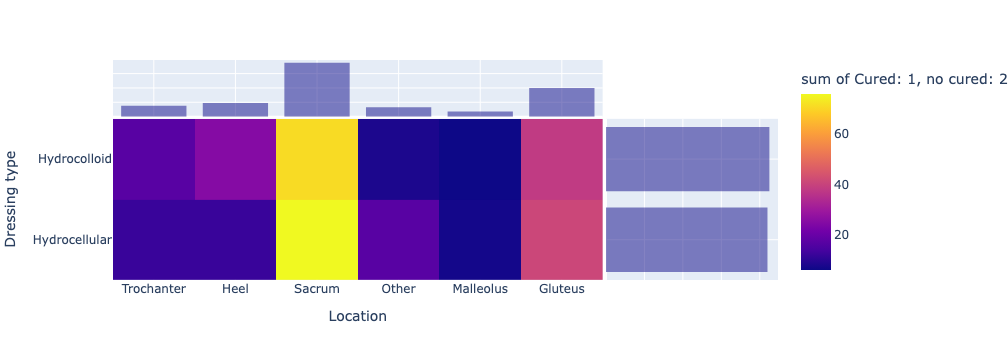

In [30]:
px.density_heatmap(analysis_df, x='Location', y='Dressing type', z='Cured: 1, no cured: 2', marginal_x="histogram", marginal_y="histogram")